# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [8]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18291,1266,21042,5373,4173,14472
1,5396,7503,10646,91,4167,239
2,13360,944,11593,915,1679,573


Percentiles Data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
71,78.9,20.0,92.5,83.9,77.0,99.5
221,35.9,76.8,75.0,2.7,76.8,13.9
323,68.0,12.6,78.6,33.6,61.8,33.6


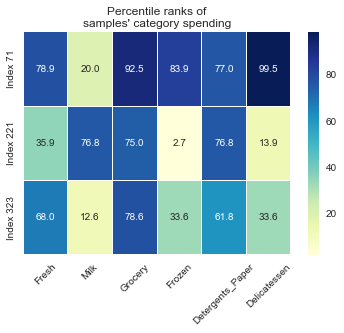

In [9]:
# Select three indices of your choice you wish to sample from the dataset
indices = [71,221,323]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Generate a heatmap of the percentiles
pcts = rs.percentile_heatmap(indices, data)
# Display the percentiles data
print "Percentiles Data:"
display(pcts)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- Choice 1 (index = 71):  __Retailer or Market__
    - Fresh: > mean, > 75%
    - Milk: < mean, ~= 25%
    - Grocery: > mean, > 75%
    - Frozen: > mean, > 75%
    - Detergents Paper: > mean, ~= 75%
    - Delicatessen: > mean, ~= 75% (x3 std deviations)
    
    
- Choice 2 (index = 221): __Cafe__
    - _Fresh_: < mean, between 25% and 50%
    - _Milk_: > mean, ~= 75%
    - _Grocery_: > mean, ~= 75%
    - _Frozen_: < mean, < 75%
    - _Detergents Paper_: > mean, ~= 75%
    - _Delicatessen_: < mean, ~= 25%
    
    
- Choice 3 (index = 323): __Market__
    - Fresh: > mean, ~= 65%
    - Milk: < mean, ~= 15%
    - Grocery: > mean, > 75%
    - Frozen: < mean, ~= 25%
    - Detergents Paper: < mean, < 75%, > 50%
    - _Delicatessen_: < mean, > 25%, < 50%

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

column_to_drop = 'Grocery'

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop([column_to_drop], axis = 1)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data[column_to_drop], 
                                                    test_size=0.33, random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
fit = regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = fit.score(X_test, y_test)


# Check the feature importances & score
print "The R^2 score when dropping the '{}' column is {}".format(column_to_drop, score)

The R^2 score when dropping the 'Grocery' column is 0.672014998991


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

The selected feature is __Grocery__. This feature was selected because it has an __R^2 score of 0.67__ which indicates that we are closer to a perfect fit when predicting / trying to identify customers spending habits.

A higher R^2 score means we can drop that feature and still be able to predict it from the other features.

Other features, _such as 'Fresh' and 'Milk'_, were tested against and either had a low or negative score. Another feature that had a high fit score is 'Detergents_Paper'.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

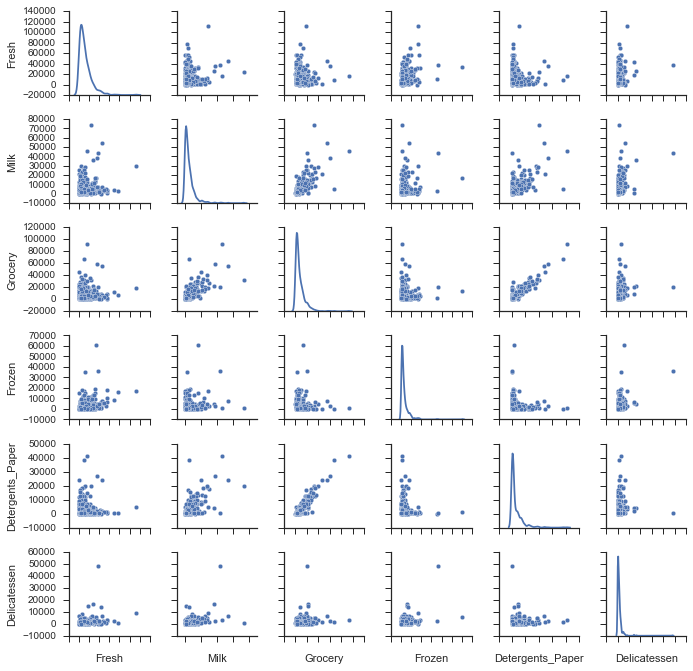

In [28]:
# Produce a scatter matrix for each pair of features in the data
# (changed original codebase to use seaborn)
mx_plot = sns.pairplot(data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[])

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

__Detergents Paper and Grocery__ exhibit a higher degree of correlation that other figures shown in the scatter matrix above.

This confirms the previous answer about the relevance of 'Grocery' and 'Detergents_Paper' features. The data however doesn't seem to be normally distributed.

Other interesting figures include __'Milk' and 'Detergents_Paper'__ or __'Grocery' and 'Milk'__ but the correlation degrees are not as strong.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

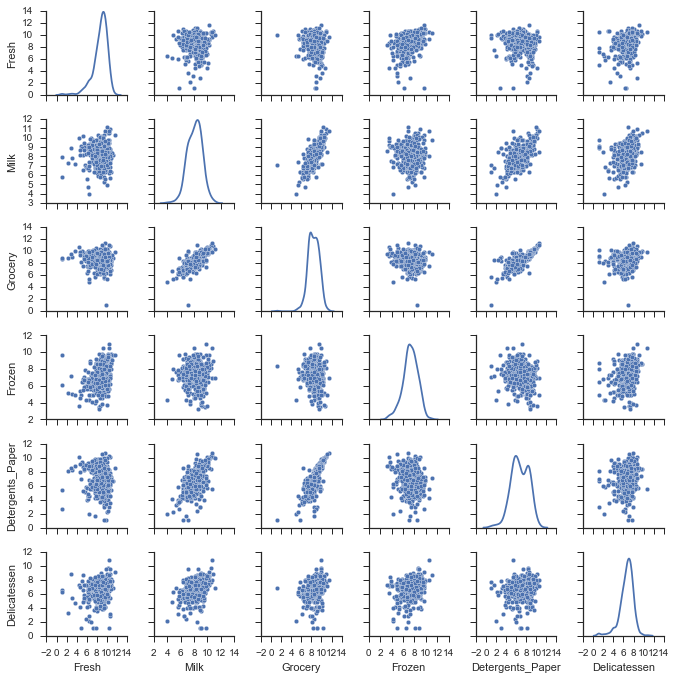

In [26]:
from scipy import stats

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log)

# Scale the data using the natural logarithm
log_data = pd.DataFrame(transformer.transform(data))
log_data.columns = data.keys()

# Scale the sample data using the natural logarithm
data_samples = data.sample(15, random_state=42)
log_samples = pd.DataFrame(transformer.transform(data_samples))
log_samples.columns = data.keys()

# Produce a scatter matrix for each pair of newly-transformed features
# (changed original codebase to use seaborn)
sns.pairplot(log_data, diag_kind="kde", size=1.6)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [29]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.684232,10.065904,9.525078,9.225721,6.721426,8.198639
1,9.284148,7.069023,7.633854,7.647786,5.707110,5.117994
2,10.217568,8.879612,9.418248,7.940584,8.438366,6.929517
3,10.361355,6.192362,7.309881,8.083946,4.709530,6.421622
4,6.295266,6.801283,7.416980,6.025866,4.477337,6.257668
5,8.703175,8.117909,8.089789,7.826842,5.356586,6.530878
6,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
7,9.245901,9.130431,9.306468,6.602588,8.171034,7.758761
8,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527
9,8.836955,6.952729,7.062192,7.634821,6.385194,5.934894


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [35]:
from collections import Counter

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    # Add the outliers indices to the list of outliers for removal later on
    outliers.extend(list(feature_outliers.index.values))

# Find the data points that where considered outliers for more than one feature
multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[multi_feature_outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are data points that were considered outliers for more than one feature. These points have the following indices: `[128, 65, 154, 75, 66]`.

We can remove data points based on being outliers for more than a single feature. Although, we could also argue that outliers for certain features such as __'Grocery' or 'Detergents_Paper'__ are the only ones we need to remove since these columns biggest correlation score when fitting.

In this submission, we chosen to remove the data points that are considered outliers for multiple features as implemented in the code above.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

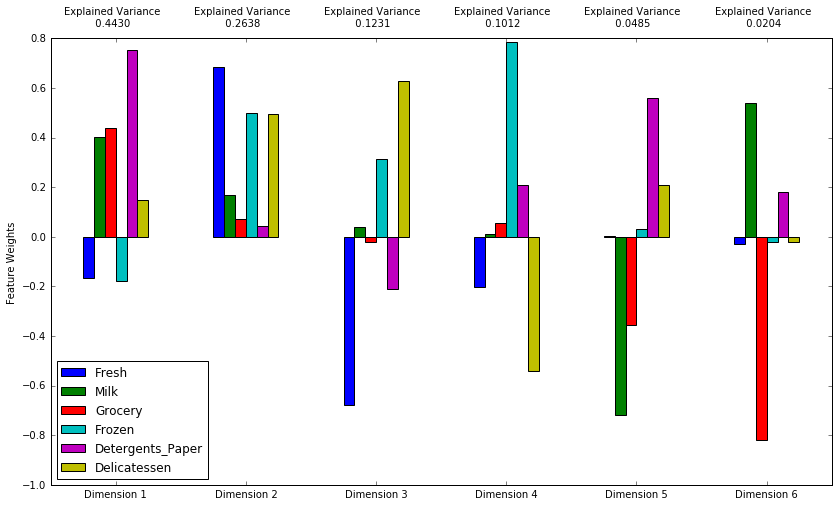

In [11]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys())).fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Explained Variances of first and second principal components:

| Principal Component | Explained Variance |
|:--------------------|:------------------:|
| First PC            | 0.4430             |
| Second PC           | 0.2638             |


##### Discussion:

- __First Principal Component__:
    - This component strongly correlates `Milk`, `Grocery` and `Detergents_Paper`.
    - Negative weights for `Fresh` and `Frozen`.
    - This compoennt can be viewed as the spending habit of a customer that is a __cafe / grocery store__.
    
    
- __Second Principal Component__:
    - This component strongly correlates `Fresh`, `Frozen` and `Delicatessen`.
    - This component could be representative of customers such as __Markets or Delis__.
    
    
- __Third Principal Component__:
    - This component strongly correlates `Frozen` and `Delicatessen`
    - Negative weights for `Fresh`.
    - This component could be representative of customers such as __frozen food retailers__.
    
    
- __Fourth Principal Component__:
    - This component strongly correlates `Frozen` and `Detergents_Paper`.
    - Negative weights for `Fresh` and `Delicatessen`.
    - This component could be representative of customers such as __frozen food retailers__ or __grocery stores__.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.0865,2.0344,1.6738,0.7621,-1.4379,0.0924
1,-1.9883,-0.5442,-1.0348,0.7146,0.1285,-0.0839
2,1.6356,1.6827,-0.9765,0.4665,0.1076,-0.1409
3,-3.2945,0.8454,-0.6254,-0.1083,0.6073,-0.5397
4,-2.1545,-2.9553,1.4490,-0.8401,-0.1114,-0.1769
5,-1.3537,0.0379,0.4107,0.1730,-0.6837,0.0300
6,-0.8750,-5.9374,-1.4791,0.3418,-0.6174,-0.6498
7,2.0119,0.7790,-0.1498,-0.8947,-0.0556,0.0770
8,-1.6691,0.3980,0.5161,-1.3189,-0.0913,-0.0056
9,-1.5763,-0.4848,-0.3596,0.4615,0.9630,0.4432


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.0865,2.0344
1,-1.9883,-0.5442
2,1.6356,1.6827
3,-3.2945,0.8454
4,-2.1545,-2.9553
5,-1.3537,0.0379
6,-0.8750,-5.9374
7,2.0119,0.7790
8,-1.6691,0.3980
9,-1.5763,-0.4848


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**


__K-Means Clustering:__

- Advantages
    - With a large number of features, K-means can be computationally faster if K is small.
    - K-Means could result in tighter clusters than hierarchical clustering.
     
 
- Disadvantages
    - Difficulty in comparing quality of the clusters produced.
    - Since preset `K` value is required, it could be difficult to predict which `K` is best.


__Gaussian Mixture:__

- Advantages
    - Capable of "soft" classification
    - Works with different distributions of the data

- Disadvantages
    - Could fail if the dimensionality of the problem is too high


----

__Chosen Algorithim:__


In this submission, the chosen algorithim is __Gaussian Mixture Model__ because of its ability to apply "soft" classification and since we've reduced the dimensionality of the problem with PCA, GMM should be able to do the job.

If our dataset was considerably larger, we could reconsider and use K-means.

----

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GMM(n_components=2)
gmm = clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = gmm.predict(reduced_data)

# Find the cluster centers
centers = gmm.means_

# Predict the cluster for each transformed sample data point
sample_preds = gmm.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, metric='euclidean')

# Print the score result
print "The silhouette_score is: {}".format(score)

The silhouette_score is: 0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**


| Number of Clusters | Silhouette Scoree |
|:------------------:|:-----------------:|
|      2             |      0.4118       |
|      3             |      0.3735       |
|      4             |      0.3333       |
|      5             |      0.2870       |


As we can see in the table above, the __best number of clusters is 2__.

As we increase the number of clusters, the Silhouette score gets closer to 0 which indicate overlapping clusters. Where as when using 2 clusters, we get score values closer to 1 indicating dense and well seperated clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

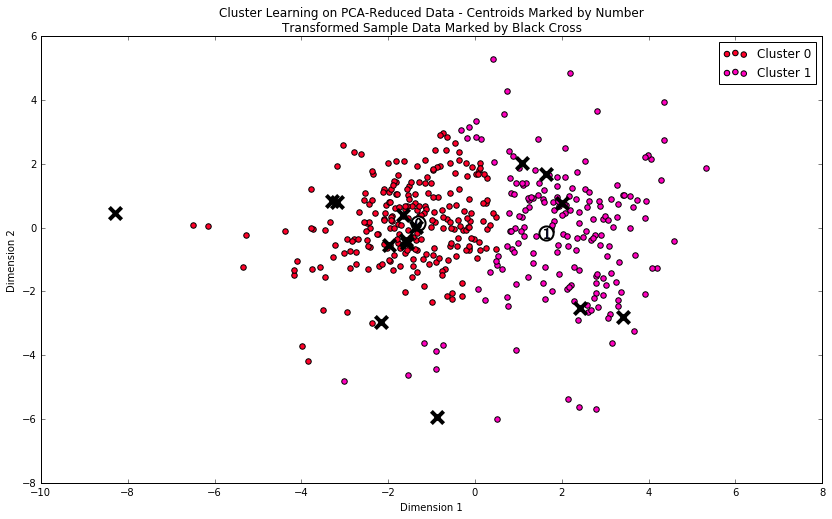

In [16]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

__Segment 0__ could represent Cafes or Diners while __Segment 1__ could represent retailers and grocery stores.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [18]:
# Display the predictions
for i, (pred, sample) in enumerate(zip(sample_preds, data_samples.values)):
    print "Sample point", i, "predicted to be in Cluster", pred
    print "Data for this sample: ", sample
    print "-----"

Sample point 0 predicted to be in Cluster 1
Data for this sample:  [ 5909 23527 13699 10155   830  3636]
-----
Sample point 1 predicted to be in Cluster 0
Data for this sample:  [10766  1175  2067  2096   301   167]
-----
Sample point 2 predicted to be in Cluster 1
Data for this sample:  [27380  7184 12311  2809  4621  1022]
-----
Sample point 3 predicted to be in Cluster 0
Data for this sample:  [31614   489  1495  3242   111   615]
-----
Sample point 4 predicted to be in Cluster 0
Data for this sample:  [ 542  899 1664  414   88  522]
-----
Sample point 5 predicted to be in Cluster 0
Data for this sample:  [6022 3354 3261 2507  212  686]
-----
Sample point 6 predicted to be in Cluster 1
Data for this sample:  [ 327  918 4710   74  334   11]
-----
Sample point 7 predicted to be in Cluster 1
Data for this sample:  [10362  9232 11009   737  3537  2342]
-----
Sample point 8 predicted to be in Cluster 0
Data for this sample:  [10290  1981  2232  1038   168  2125]
-----
Sample point 9 pred

**Answer:**

The results above align well with the initial intuition about the problem. We can also observe that the columns that had a high R^2 value do indeed effect the clustering of most customers.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

The assumption is that Cafes and Diners which means they are likely to be effected the delivery service change.

Since retails make larger order and possibly have more space to stock items, they are likely to make their orders once or twice a week.

The distributor can identify which customer segment would be most affected by the delivery service change can be found by running an A/B test on the patterns of the orders for each segment.

By inspecting the number of times each of those customer segments makes an order (per week); we can assume that customers who need more than 3 deliveries per week to be affected by the service change. We can then count the number of customers affected from each segment and make a decision on whether or not to go ahead with the change.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

The segment classification (or cluster) itself could be another feature used to help with making predictions in a supervised learning model.

For example, let's consider than we fed back the cluster of each customer into the original dataset. We can then run a supervised learning model to predict if a certain customer would be interested in opting in for a new service the distributor is thinking about offering.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

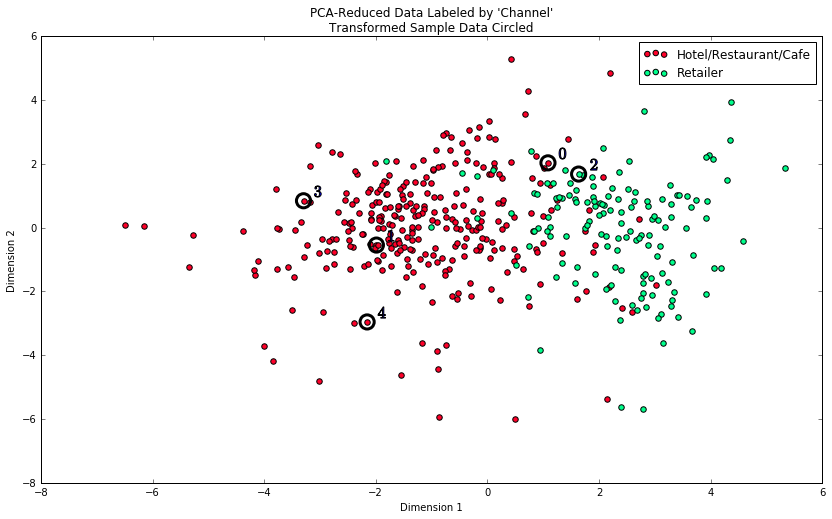

In [49]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, multi_feature_outliers, pca_samples[:5])

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithim chosen has correctly identified 4 out of the 5 first samples. Also the initial intuition of these 2 customer segments has turned out to the close to accurate in terms of the kinds of customers they might be.

Since we have used the GMM learning model which uses probability instead of "hard" classification. This means that there are technically no points which are entirely segment 0 or segment 1, rather a probability of being each of those clusters.

I would consider the majority of these classifications to be inline with the real results.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.